In [32]:
# import necessary libraries
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
import plotly.subplots as sp
from plotly.subplots import make_subplots
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [33]:
# load the data
df=pd.read_csv(r'D:/DS Project/Dataset.csv', encoding='windows-1252')
# print(df)

In [34]:
#check unique column
df.columns.unique()

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [36]:
# Check unique values for selected columns
for feature in ['Segment', 'Country', 'State', 'Region', 'Category', 'Sub-Category', 'Ship Mode']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

Segment 3 unique values are: ['Consumer' 'Home Office' 'Corporate']
Country 1 unique values are: ['United States']
State 47 unique values are: ['Ohio' 'California' 'Wisconsin' 'Texas' 'North Carolina' 'Alabama'
 'Michigan' 'Florida' 'Washington' 'Pennsylvania' 'District of Columbia'
 'Missouri' 'Colorado' 'Tennessee' 'Indiana' 'Massachusetts' 'Vermont'
 'New York' 'Connecticut' 'Illinois' 'Montana' 'Arizona' 'Georgia'
 'Kansas' 'Iowa' 'Virginia' 'Maryland' 'Minnesota' 'Louisiana'
 'New Jersey' 'Oklahoma' 'Delaware' 'Kentucky' 'Mississippi' 'Arkansas'
 'New Mexico' 'South Carolina' 'Rhode Island' 'Nevada' 'Oregon'
 'North Dakota' 'Idaho' 'New Hampshire' 'Nebraska' 'West Virginia'
 'South Dakota' 'Utah']
Region 4 unique values are: ['East' 'West' 'Central' 'South']
Category 3 unique values are: ['Furniture' 'Office Supplies' 'Technology']
Sub-Category 17 unique values are: ['Furnishings' 'Binders' 'Storage' 'Chairs' 'Art' 'Appliances' 'Machines'
 'Tables' 'Accessories' 'Paper' 'Supplies'

In [37]:
# drop unused columns
df = df.drop(columns=['Order Date', 'Ship Mode', 'Country', 'Postal Code', 'Row ID', 'Customer ID', 'Product ID', 'Order ID'])
df.head()

,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Consumer,Lorain,Ohio,East,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,Consumer,Los Angeles,California,West,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,Home Office,Franklin,Wisconsin,Central,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,Consumer,Huntsville,Texas,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,Consumer,Huntsville,Texas,Central,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [38]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       3312 non-null   object 
 1   City          3312 non-null   object 
 2   State         3312 non-null   object 
 3   Region        3312 non-null   object 
 4   Category      3312 non-null   object 
 5   Sub-Category  3312 non-null   object 
 6   Product Name  3312 non-null   object 
 7   Sales         3312 non-null   float64
 8   Quantity      3312 non-null   int64  
 9   Discount      3312 non-null   float64
 10  Profit        3312 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 284.8+ KB


In [39]:
#check missing value
df.isnull().values.any()

False

In [40]:
# check duplicates
dup = df.loc[df.duplicated()]
dup

,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
279,Corporate,Los Angeles,California,West,Furniture,Tables,"Lesro Sheffield Collection Coffee Table, End T...",399.672,7,0.2,-14.9877
432,Corporate,New York City,New York,East,Furniture,Chairs,Global Deluxe Steno Chair,207.846,3,0.1,2.3094
2745,Consumer,Chicago,Illinois,Central,Office Supplies,Labels,Avery File Folder Labels,11.520,5,0.2,4.1760
2995,Consumer,New York City,New York,East,Office Supplies,Storage,Safco Industrial Wire Shelving System,272.940,3,0.0,0.0000
3091,Consumer,Seattle,Washington,West,Office Supplies,Storage,Sterilite Officeware Hinged File Box,31.440,3,0.0,8.4888
3176,Consumer,Los Angeles,California,West,Office Supplies,Art,Newell 327,6.630,3,0.0,1.7901


In [41]:
df.duplicated().sum()
df= df.drop_duplicates()
df

,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Consumer,Lorain,Ohio,East,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,Consumer,Los Angeles,California,West,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,Home Office,Franklin,Wisconsin,Central,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,Consumer,Huntsville,Texas,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,Consumer,Huntsville,Texas,Central,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...
3307,Consumer,New York City,New York,East,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,Consumer,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,Corporate,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,Corporate,Fairfield,California,West,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [42]:
df.describe()

,Sales,Quantity,Discount,Profit
count,3306.000000,3306.000000,3306.000000,3306.000000
mean,221.501878,3.766485,0.156600,28.263005
std,585.746978,2.222817,0.207559,242.080657
min,0.444000,1.000000,0.000000,-3839.990400
25%,17.028000,2.000000,0.000000,1.766475
50%,53.810000,3.000000,0.200000,8.299200
75%,204.950000,5.000000,0.200000,28.390650
max,13999.960000,14.000000,0.800000,6719.980800


In [43]:
df1=df[df['Sales']==13999.960000]
df1


,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
427,Consumer,Seattle,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808


In [44]:
df2=df[df['Profit']==-3839.990400]
df2

,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2443,Corporate,Burlington,North Carolina,South,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.98,4,0.5,-3839.9904


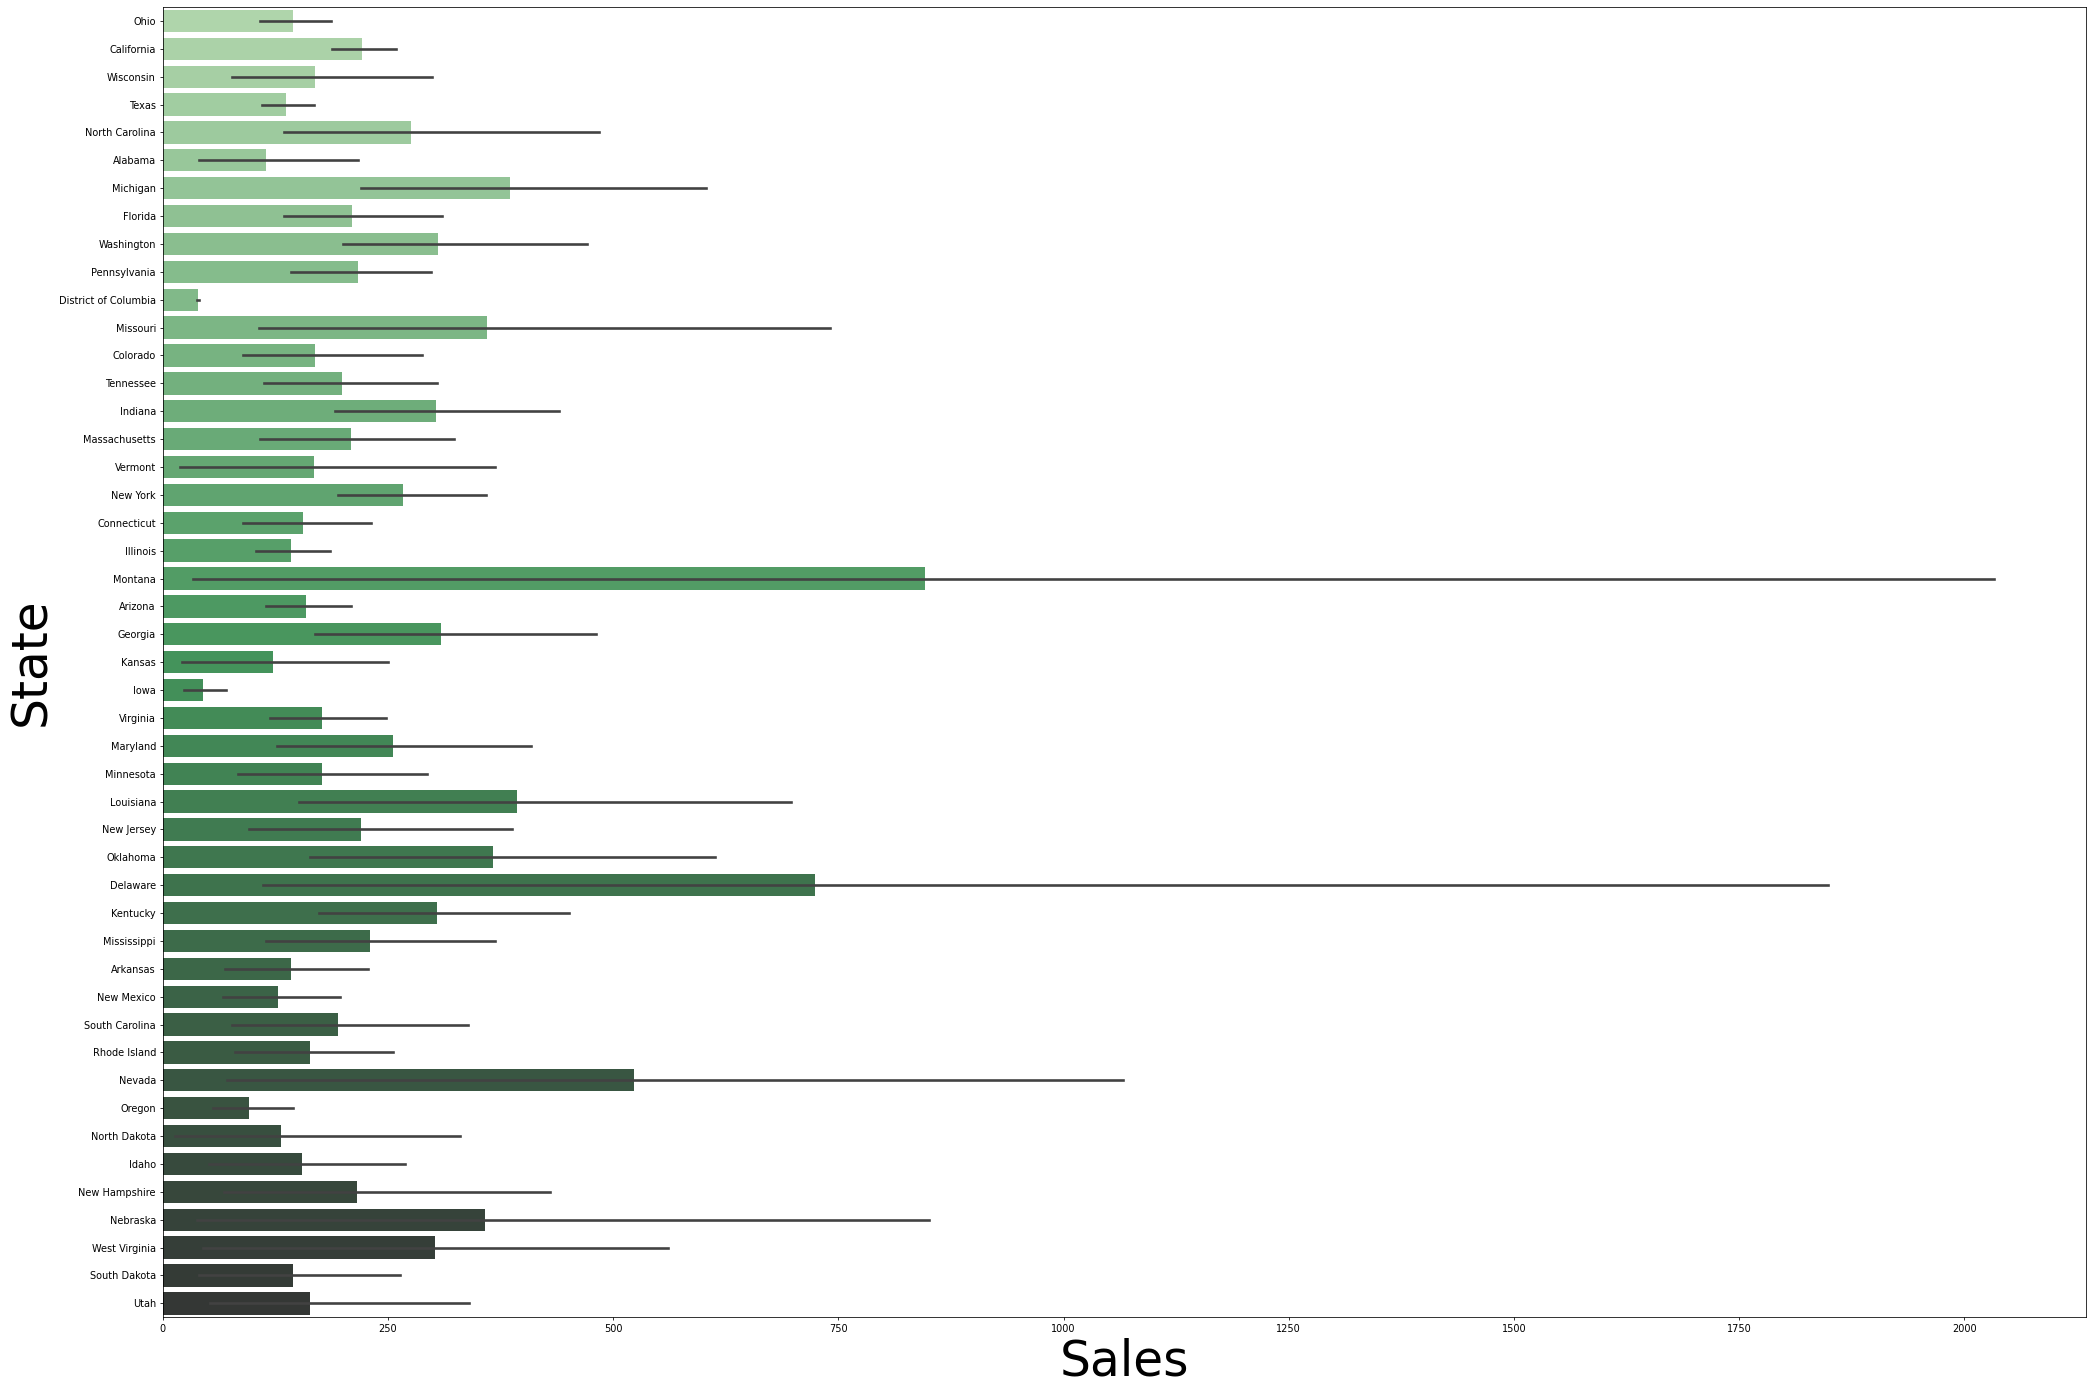

In [45]:
plt.figure(figsize = (30,20),dpi = 70)
# Check the relationship between the sale and the state
ax = sns.barplot(x = 'Sales', y = 'State', data= df, palette="Greens_d")
plt.xlabel('Sales',fontsize = '50')
plt.ylabel('State',fontsize = '50')
plt.tight_layout()

In [46]:
df_hist_sub = df.copy()

# # Create subplots with 5 rows and 3 columns
# fig1 = make_subplots(rows=5, cols=3)
df_hist_sub = df_hist_sub.drop(columns=['Product Name', 'Region' , 'Segment' , 'Category'])
columns_to_plot = df_hist_sub.columns[:15]
data_to_plot = df_hist_sub[columns_to_plot]
num_subplots = len(columns_to_plot)

# Specify the number of columns, rows
num_cols = 3
num_rows = (num_subplots + num_cols - 1) // num_cols

fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=columns_to_plot)

# Loop through the columns and create histograms for each column
for i, column in enumerate(columns_to_plot):
    # Calculate the row and column indices for the subplot
    row = i // 3 + 1
    col = i % 3 + 1
    

    fig.add_trace(go.Histogram(x=data_to_plot[column], nbinsx=150, name=column), row=row, col=col)

# Update subplot layout
fig.update_layout(
    title="Histograms of Superstore Data",
    showlegend=False,
    height=1750,
    width=1280
)

# Show plot
fig.show()

In [47]:
#Sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

fig_sales_by_category = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_sales_by_category.update_traces(textposition='inside', textinfo='percent+label')
fig_sales_by_category.update_layout(title_text='Sales by Category', title_font=dict(size=30))

fig_sales_by_category.show()

In [48]:
# sales by subcategory
df_subcat_sales = df.copy()

df_subcat_sales['Sub-Category'] = df_subcat_sales['Sub-Category'].astype(str)
df_subcat_sales = df_subcat_sales.groupby(['Sub-Category', 'Category'], as_index=False)['Sales'].sum()

# sort data by sales in descending order
df_subcat_sales = df_subcat_sales.sort_values(by='Sales', ascending=False)

# Column chart for overall sales by sub-category
fig_subcat_sales = px.bar(df_subcat_sales, x='Sub-Category', y='Sales', 
                 barmode='stack', color='Category', 
                 title='Sales by Sub-Category')
fig_subcat_sales.update_layout(showlegend=True)

fig_subcat_sales.show()

In [49]:
#Sales by Region
#Which region are performing the best/worst?
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

fig_sales_by_region= px.pie(sales_by_region, 
             values='Sales', 
             names='Region', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_sales_by_region.update_traces(textposition='inside', textinfo='percent+label')
fig_sales_by_region.update_layout(title_text='Sales by Region', title_font=dict(size=30))

fig_sales_by_region.show()

In [50]:
#Profit by category
Profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

fig_profit_by_category = px.pie(Profit_by_category, 
             values='Profit', 
             names='Category', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_profit_by_category.update_traces(textposition='inside', textinfo='percent+label')
fig_profit_by_category.update_layout(title_text='Profit by Category', title_font=dict(size=30))

fig_profit_by_category.show()

In [51]:
# sales by subcategory
df_subcat_profit = df.copy()

df_subcat_profit['Sub-Category'] = df_subcat_profit['Sub-Category'].astype(str)
df_subcat_profit = df_subcat_profit.groupby(['Sub-Category', 'Category'], as_index=False)['Profit'].sum()

# sort data by sales in descending order
df_subcat_profit = df_subcat_profit.sort_values(by='Profit', ascending=False)

# Column chart for overall sales by sub-category
fig_subcat_profit = px.bar(df_subcat_profit, x='Sub-Category', y='Profit', 
                 barmode='stack', color='Category', 
                 title='Profit by Sub-Category')
fig_subcat_profit.update_layout(showlegend=True)

fig_subcat_profit.show()

In [52]:
#Profit by Region
#Which region are performing the best/worst?
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

fig_profit_by_region= px.pie(profit_by_region, 
             values='Profit', 
             names='Region', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_profit_by_region.update_traces(textposition='inside', textinfo='percent+label')
fig_profit_by_region.update_layout(title_text='Profit by Region', title_font=dict(size=30))

fig_profit_by_region.show()

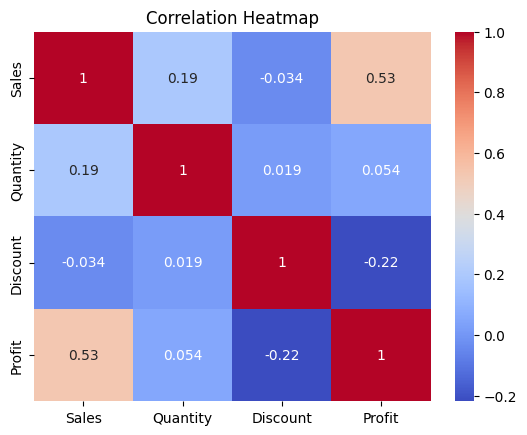

In [53]:
df_hist_sub_1= df_hist_sub.drop(columns=['City', 'State', 'Sub-Category'])
df_hist_sub_1
corr_matrix = df_hist_sub_1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3306 entries, 0 to 3311
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       3306 non-null   object 
 1   City          3306 non-null   object 
 2   State         3306 non-null   object 
 3   Region        3306 non-null   object 
 4   Category      3306 non-null   object 
 5   Sub-Category  3306 non-null   object 
 6   Product Name  3306 non-null   object 
 7   Sales         3306 non-null   float64
 8   Quantity      3306 non-null   int64  
 9   Discount      3306 non-null   float64
 10  Profit        3306 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 309.9+ KB


DATA MODELLING


In [55]:
#Encode the categorical attributes
#encoding of categorial features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if(df.dtypes[i] == 'object'):
        df[i] = le.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3306 entries, 0 to 3311
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       3306 non-null   int32  
 1   City          3306 non-null   int32  
 2   State         3306 non-null   int32  
 3   Region        3306 non-null   int32  
 4   Category      3306 non-null   int32  
 5   Sub-Category  3306 non-null   int32  
 6   Product Name  3306 non-null   int32  
 7   Sales         3306 non-null   float64
 8   Quantity      3306 non-null   int64  
 9   Discount      3306 non-null   float64
 10  Profit        3306 non-null   float64
dtypes: float64(3), int32(7), int64(1)
memory usage: 219.5 KB


In [56]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score #cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

#using standard scaler 
sc = StandardScaler()
x = df.drop(['Sales'] , axis = 1).values
y =df['Sales'].values

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

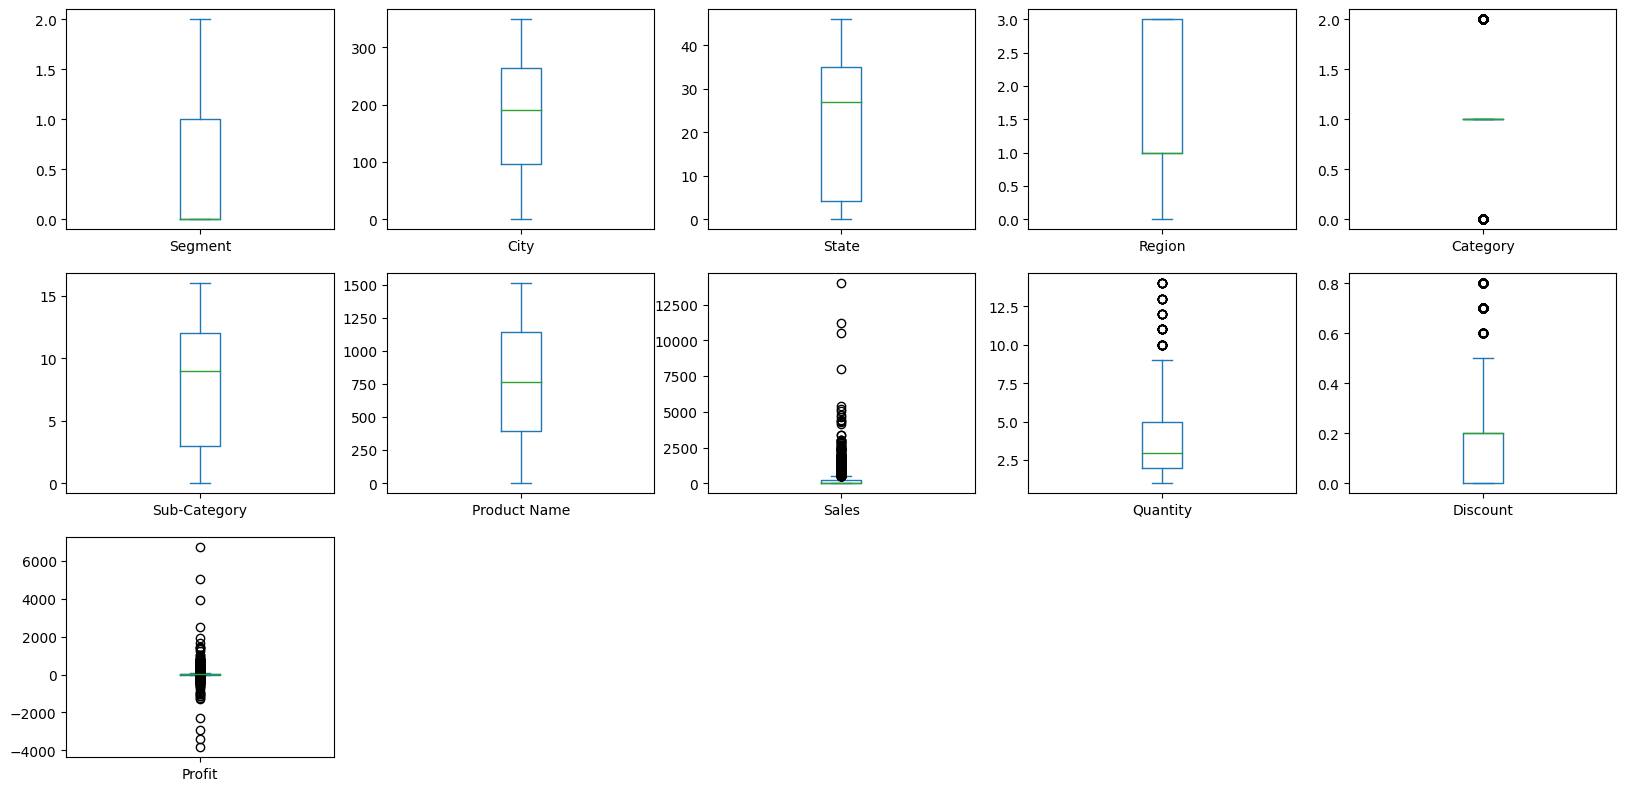

In [57]:
#representing the outliers
df.plot(kind='box', subplots=True, figsize=(20,20), layout=(6,5))
plt.show()

linear regression
0.27469615976476636
0.45979458683757224
Reg_score: 0.45979458683757224
Mean Squared Error: 168880.57298438507
Mean absolute percentage error: 7.5810834173854
Mean absolute error: 209.78563593076834
rmse: 410.95081577286726


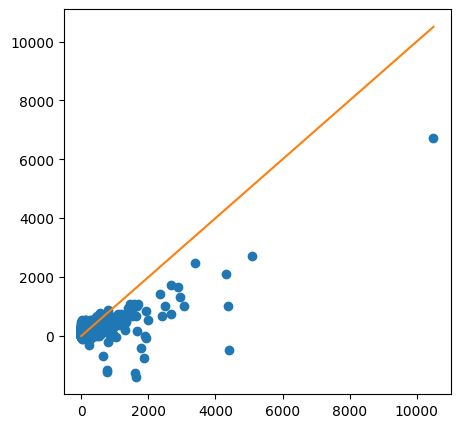

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #Pipeline([('std_scaler', StandardScaler()),('linear_regressor',LinearRegression(normalize=True,fit_intercept=False))])
lr.fit(x_train, y_train)
print("linear regression")
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

KNN
0.7183064446414829
0.6811681783545891
Reg_score: 0.6811681783545891
Mean Squared Error: 99674.12286729978
Mean absolute percentage error: 2.3205190872615358
Mean absolute error: 147.73023873510542
rmse: 315.7120885669407


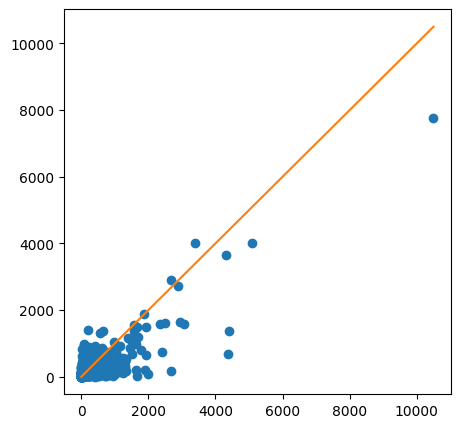

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor() #Pipeline([('knn_regressor',KNeighborsRegressor(n_neighbors=15, weights='distance'))])
knn.fit(x_train, y_train)
print('KNN')
print(knn.score(x_train,y_train))
print(knn.score(x_test , y_test))
y_pred = knn.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

DT
0.8691900094608118
0.7636440273704949
Reg_score: 0.7636440273704949
Mean Squared Error: 73890.28527552098
Mean absolute percentage error: 2.586505758316439
Mean absolute error: 128.5192787481397
rmse: 271.8276756982647


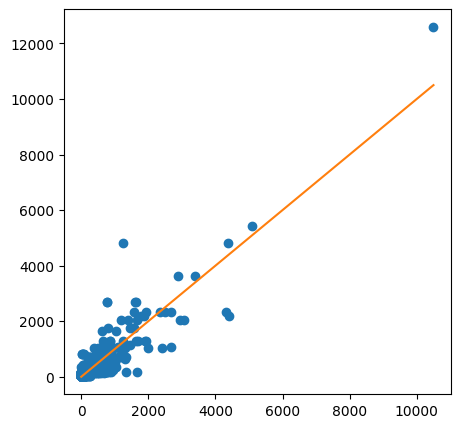

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth= 6, max_features= 7, min_samples_split= 10, random_state= 2)
param_grid = {"max_depth": [3, None,6,9],
              "max_features": [5, 7,11, 15],
              "min_samples_split": [2, 3, 10],
             "random_state":[2,4,6]}
grid = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
grid_result = grid.fit(x_train, y_train)
dt.fit(x_train,y_train)
print('DT')
print(dt.score(x_train,y_train))
print(dt.score(x_test , y_test))
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

XGB
0.896834247570625
0.48881677499734244
Reg_score: 0.48881677499734244
Mean Squared Error: 159807.57288801446
Mean absolute percentage error: 7.363294055924642
Mean absolute error: 162.76750202120914
rmse: 399.7593937458061


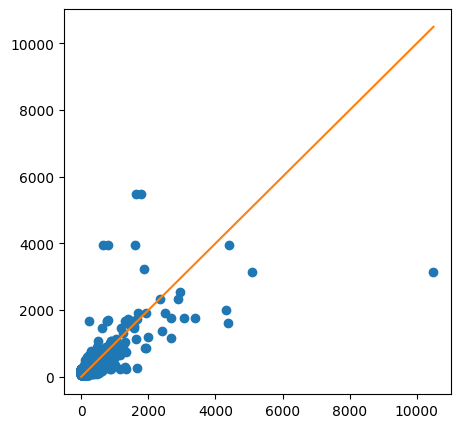

In [61]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:linear', n_estimators = 7, seed = 123) #Pipeline([('std_scaler', StandardScaler()),('xgboost_regressor',XGBRegressor(n_estimators=50,max_depth=3))])
xgb.fit(x_train, y_train)
print('XGB')
print(xgb.score(x_train, y_train))
print(xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()